# Benefits of an indexed agricultural land database

This code is to demonstrate the benefits of indexed agricultural land database via different graphics.

This code use dataset which was received via [USDA](https://www.nass.usda.gov/datasets/) and slightly adapted. We left only 2 years (2013 and 2023) and the main data was only for 2023. We use `pandas`, `numpy` and `matplotlib` librareis to show all advantages of such database. All graphics saving in `../graphics` folder.

First, importing libraries and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/dataset.csv', index_col=0, low_memory=False)

Converting data to numeric format.

In [3]:
df['VALUE'] = df['VALUE'].replace(',', '', regex = True)
df['VALUE'] = df['VALUE'].apply(pd.to_numeric,errors='coerce')

Choosing year.

In [4]:
df_2023 = df[df['YEAR'] == 2023]

## Productivity by state

Selecting all rows in the `STATISTICCAT_DESC` column where the value is `YIELD` to group by state name and take the sum of the field yields. Cleaning the data.

In [5]:
df_yield = df_2023[(df_2023['STATISTICCAT_DESC'] == 'YIELD')&(df_2023['STATE_NAME'] != 'US TOTAL')]
df_yield_top = df_yield.groupby(['STATE_NAME'], as_index = False)['VALUE'].sum()
df_yield_top = df_yield_top.sort_values('VALUE', ascending = False)

Plotting the dependence of yield on state.

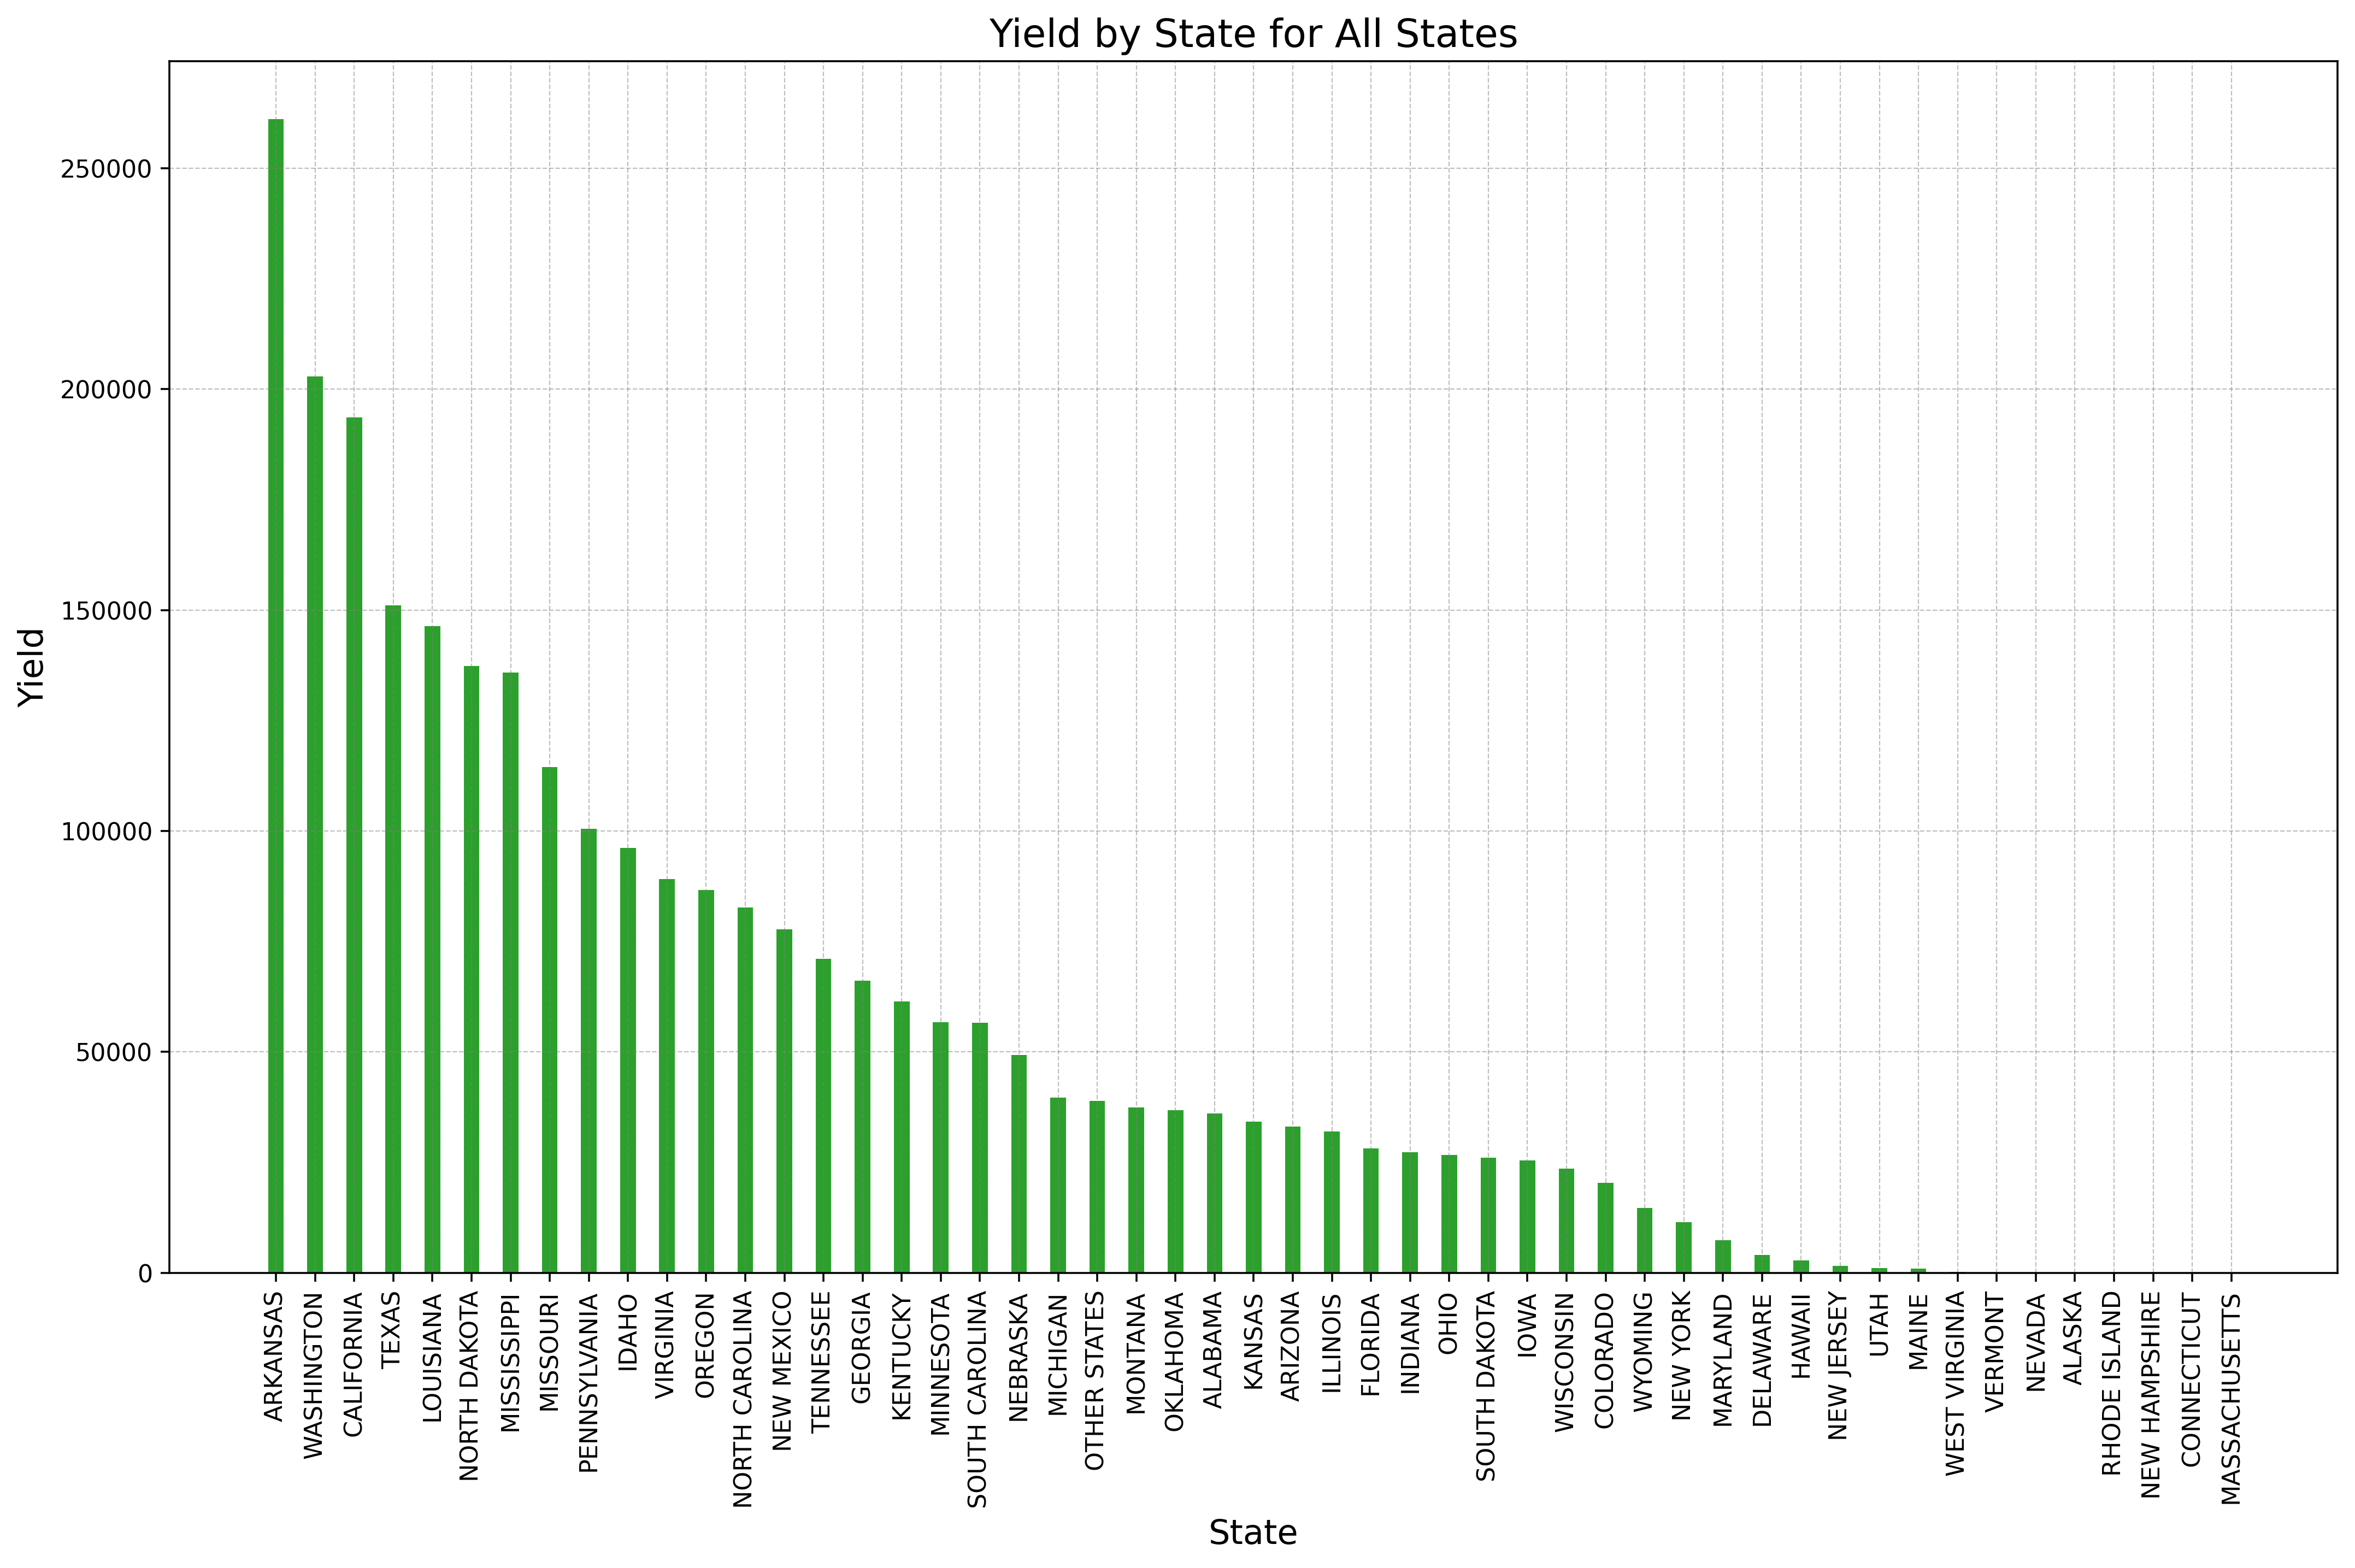

In [6]:
plt.figure(figsize=(16, 9), dpi=320)
plt.bar(df_yield_top['STATE_NAME'], df_yield_top['VALUE'], color='C2', width=0.4)
plt.xticks(rotation=90)
plt.ylabel('Yield', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.title('Yield by State for All States', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.savefig('../graphics/Yield by State for All States.png')
plt.show()

## Most common crop in every state

Finding the most common values in the `COMMODITY_DESC` field

In [7]:
df_yield_cults = df_yield.groupby(['STATE_NAME'])['COMMODITY_DESC'].agg(pd.Series.mode).reset_index()

In [8]:
crop_counts = df_yield_cults['COMMODITY_DESC'].value_counts()
crop_counts = pd.DataFrame({'CROP': crop_counts.index, 'NUMBER_OF_STATES': crop_counts.values})
crop_counts['CROP'] = crop_counts['CROP'].astype(str)

Plotting the most common crops.

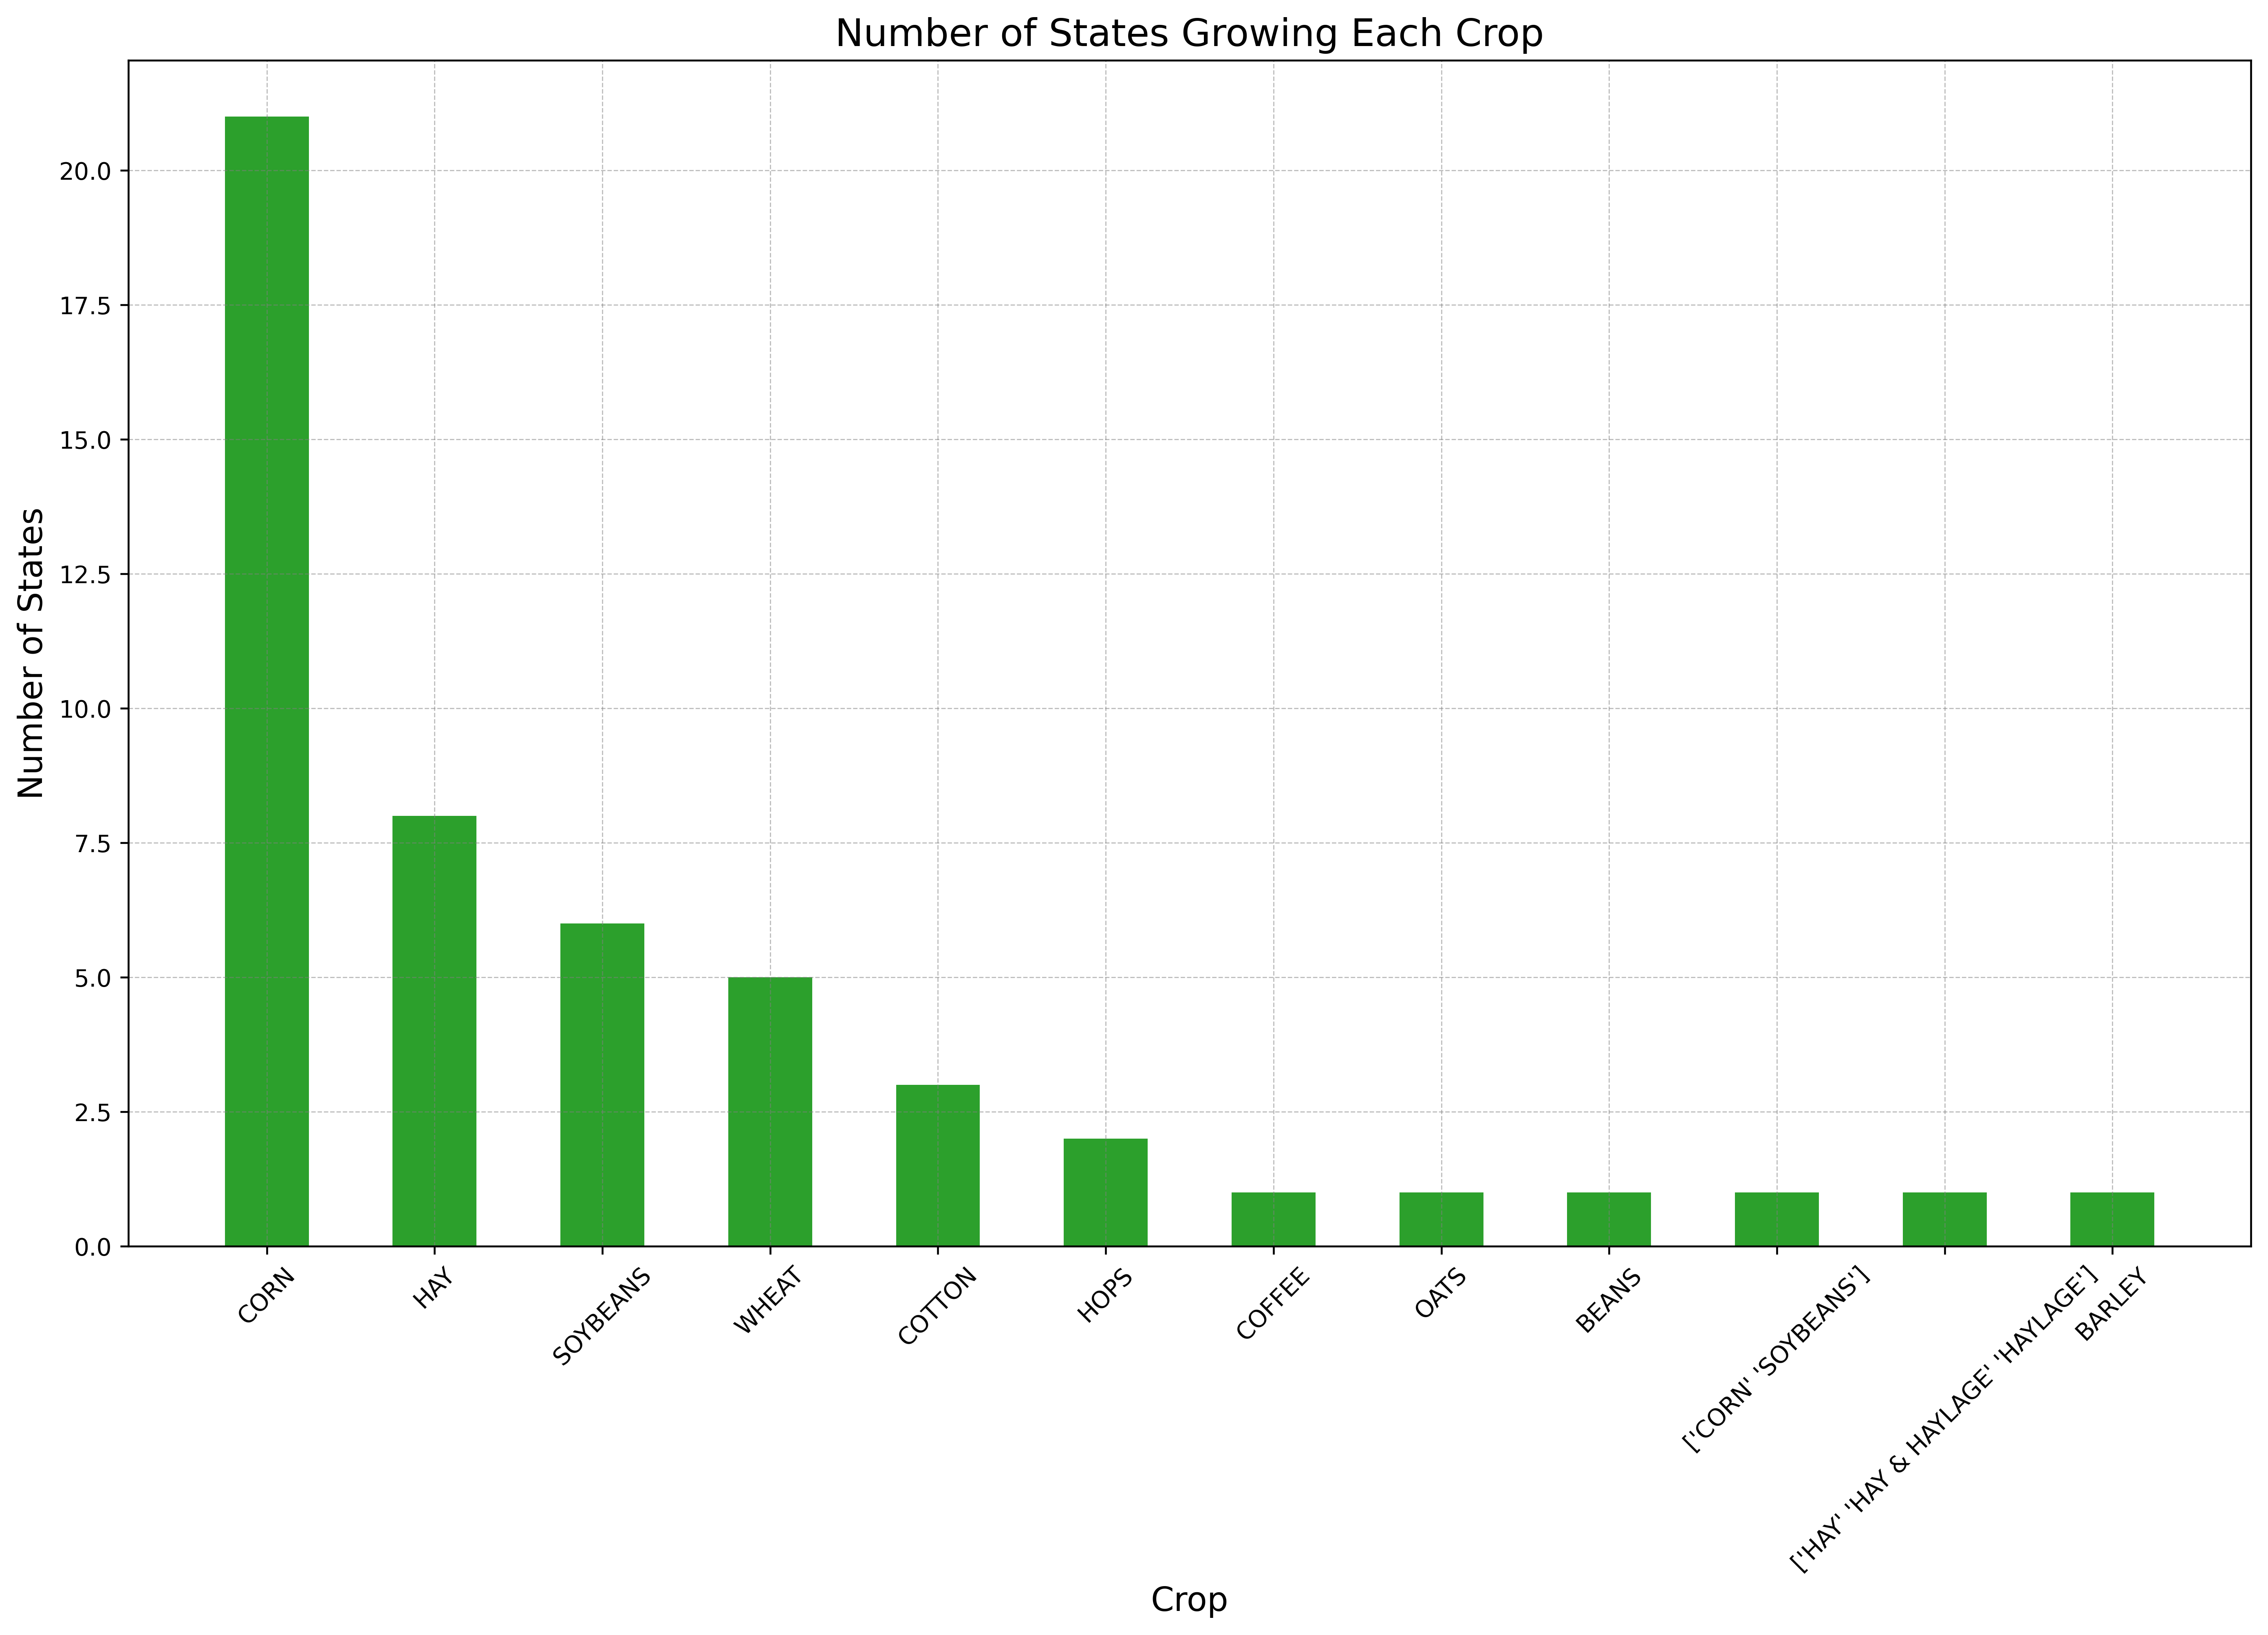

In [9]:
plt.figure(figsize=(16, 9), dpi=420)
bars = plt.bar(crop_counts['CROP'], crop_counts['NUMBER_OF_STATES'], color='C2', width=0.5)
plt.xticks(rotation=45) 
plt.ylabel('Number of States', fontsize=14)
plt.xlabel('Crop', fontsize=14)
plt.title('Number of States Growing Each Crop', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.savefig('../graphics/Number of States Growing Each Crop.png')
plt.show()

## Prevalence of utilization types

Search for the most frequently encountered values in the `UTIL_PRACTICE_DESC field` without taking into account `ALL UTILIZATION PRACTICES`.

In [10]:
df_yield_no_all_util = df_yield[df_yield['UTIL_PRACTICE_DESC']!= 'ALL UTILIZATION PRACTICES']
df_yield_util = df_yield_no_all_util.groupby(['STATE_NAME'])['UTIL_PRACTICE_DESC'].agg(pd.Series.mode).reset_index()

In [11]:
util_practice_counts = df_yield_util['UTIL_PRACTICE_DESC'].value_counts()
util_practice_counts = pd.DataFrame({'UTIL_PRACTICE_DESC': util_practice_counts.index, 'NUMBER_OF_STATES': util_practice_counts.values})
util_practice_counts['UTIL_PRACTICE_DESC'] = util_practice_counts['UTIL_PRACTICE_DESC'].astype(str)

Plotting the frequency.

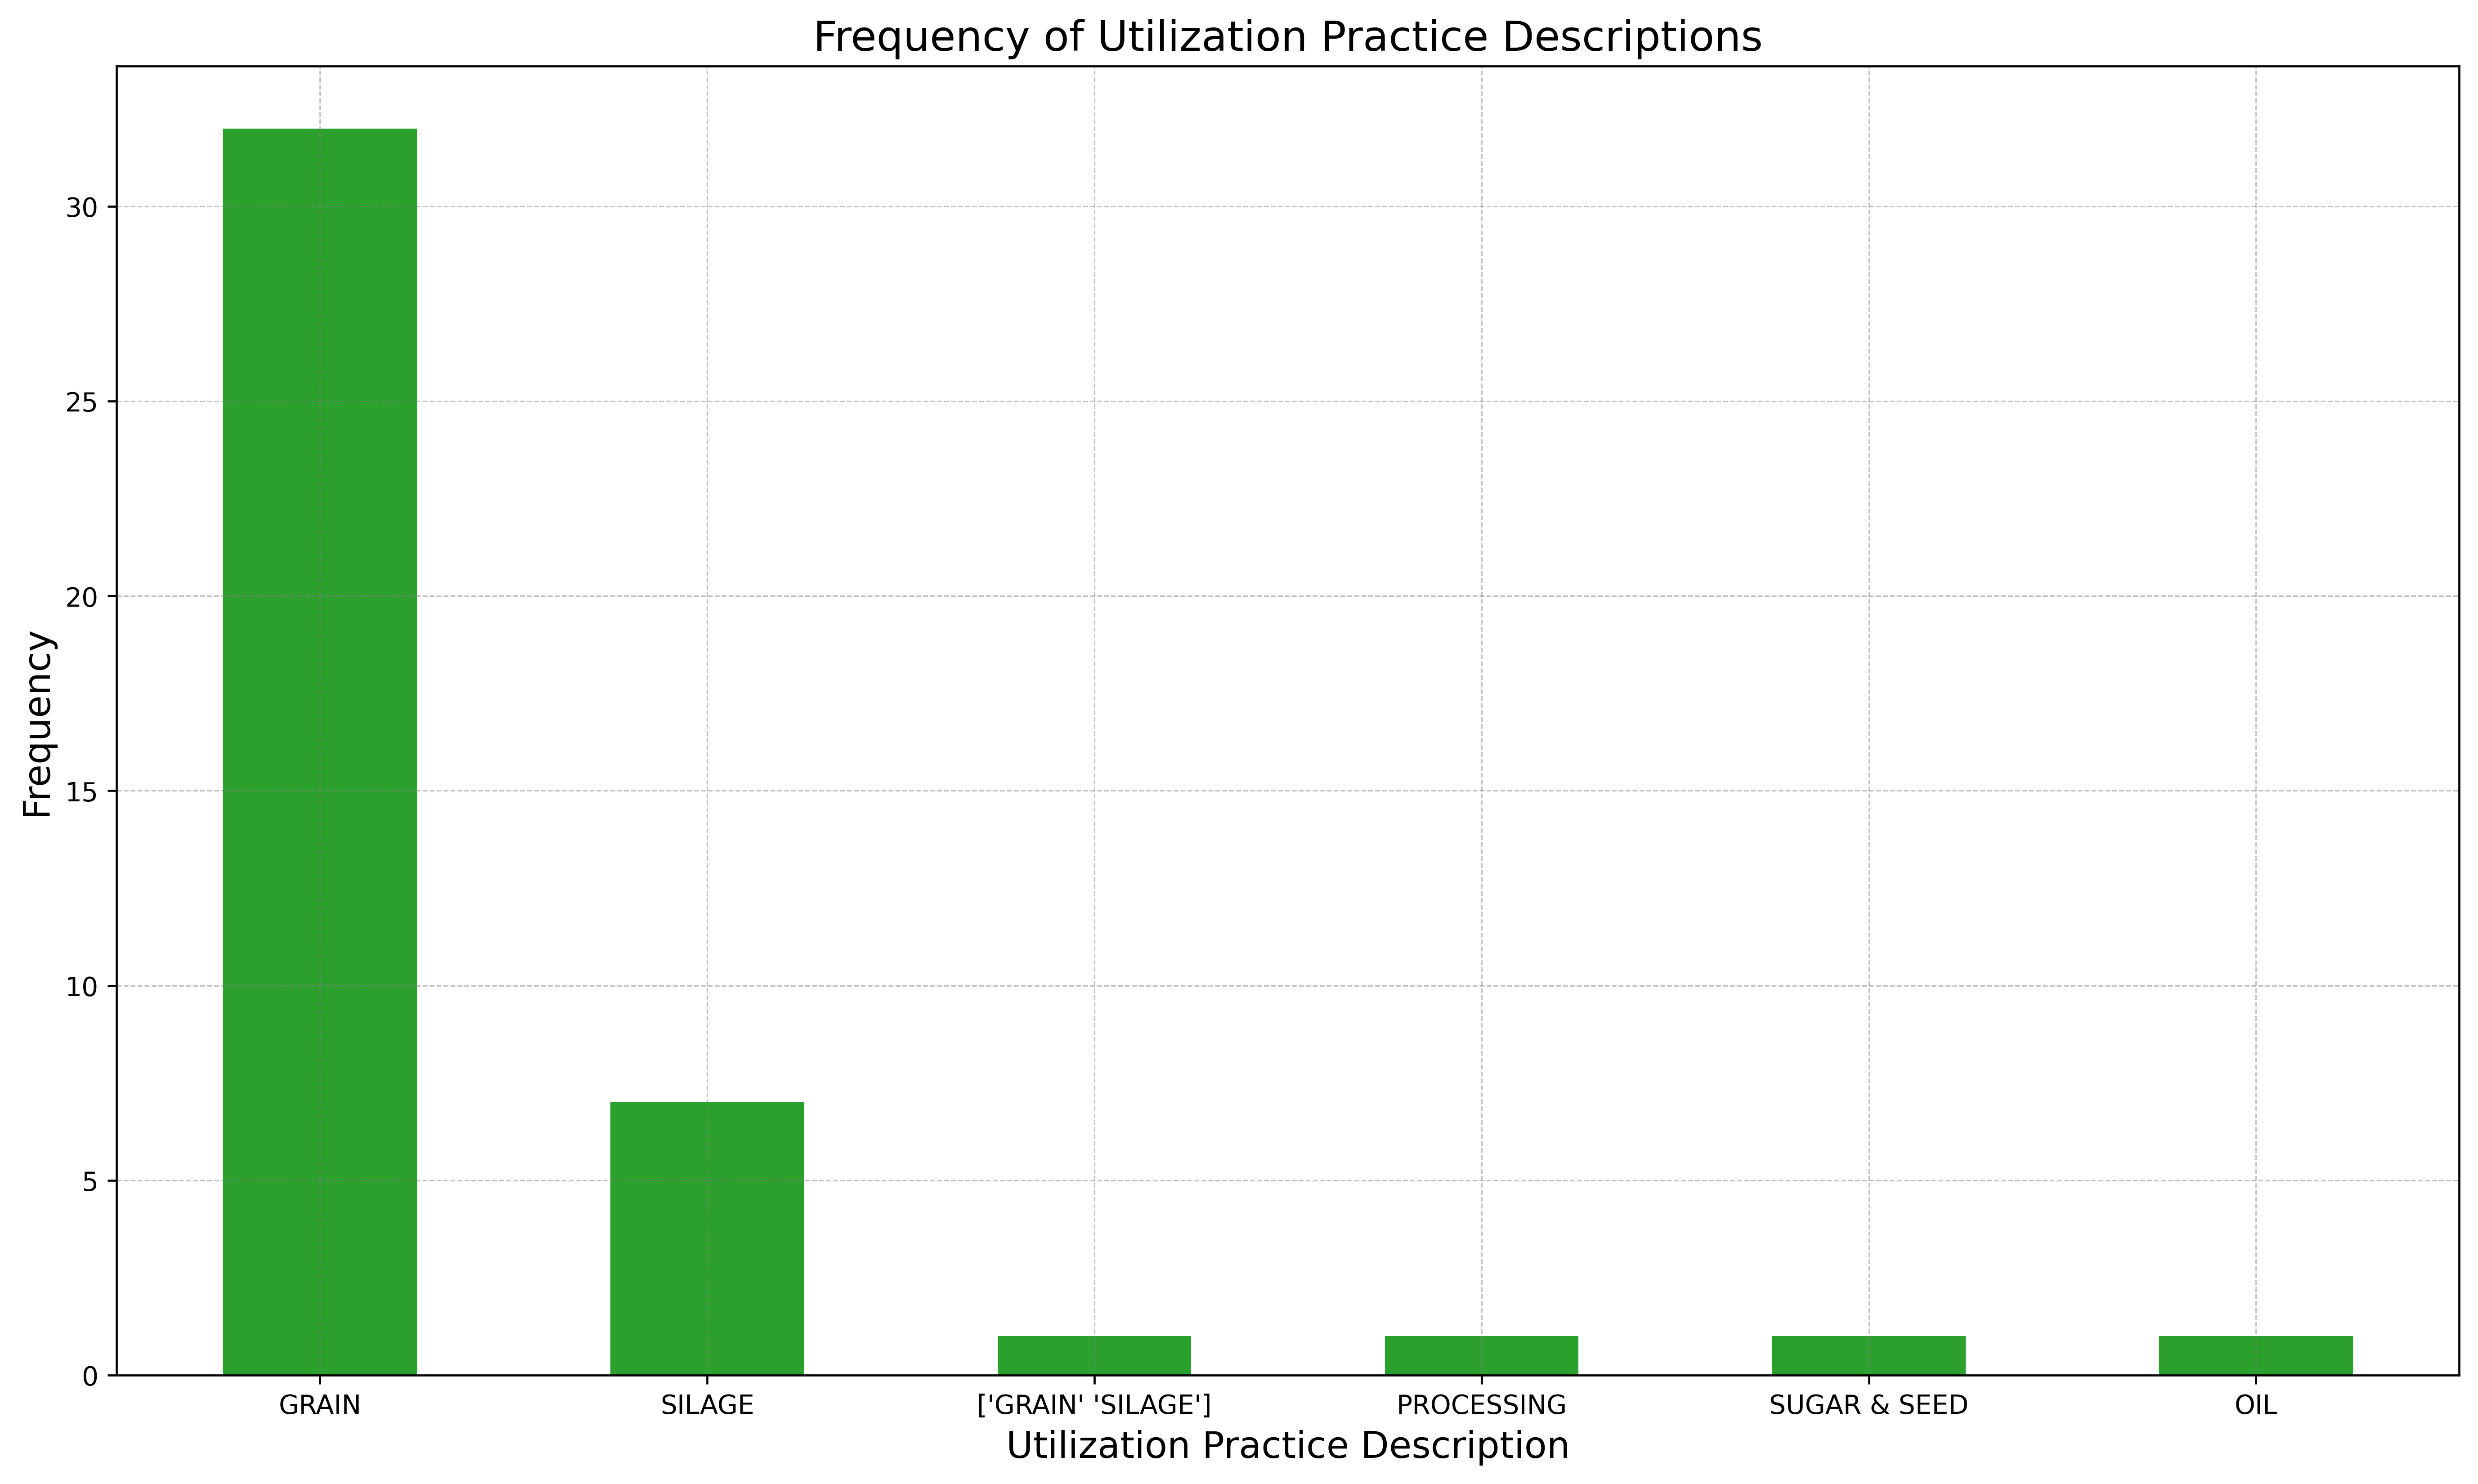

In [12]:
plt.figure(figsize=(16, 9), dpi=420)
plt.bar(util_practice_counts['UTIL_PRACTICE_DESC'], util_practice_counts['NUMBER_OF_STATES'], color='C2',  width=0.5)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Utilization Practice Description', fontsize=14)
plt.title('Frequency of Utilization Practice Descriptions', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.savefig('../graphics/Frequency of Utilization Practice Descriptions.png')
plt.show()

## Distribution of crop cultivation

Finding two dataframes for two states, comparing them and bringing them to the same length.

In [13]:
df_yield_georgia = df_yield[df_yield['STATE_NAME']=='GEORGIA']
df_yield_illinois = df_yield[df_yield['STATE_NAME']=='ILLINOIS']

In [14]:
df_yield_georgia = df_yield_georgia.groupby(['COMMODITY_DESC'], as_index = False)['VALUE'].sum()
df_yield_illinois = df_yield_illinois.groupby(['COMMODITY_DESC'], as_index = False)['VALUE'].sum()

df_yield_illinois = df_yield_illinois.merge(df_yield_georgia[['COMMODITY_DESC']], on='COMMODITY_DESC', how='outer')
df_yield_illinois = df_yield_illinois.fillna(0)
    
df_yield_georgia = df_yield_georgia.merge(df_yield_illinois[['COMMODITY_DESC']], on='COMMODITY_DESC', how='outer')
df_yield_georgia = df_yield_georgia.fillna(0)
    
df_yield_georgia = df_yield_georgia.sort_values('COMMODITY_DESC')
df_yield_illinois = df_yield_illinois.sort_values('COMMODITY_DESC')

Plotting distribution.

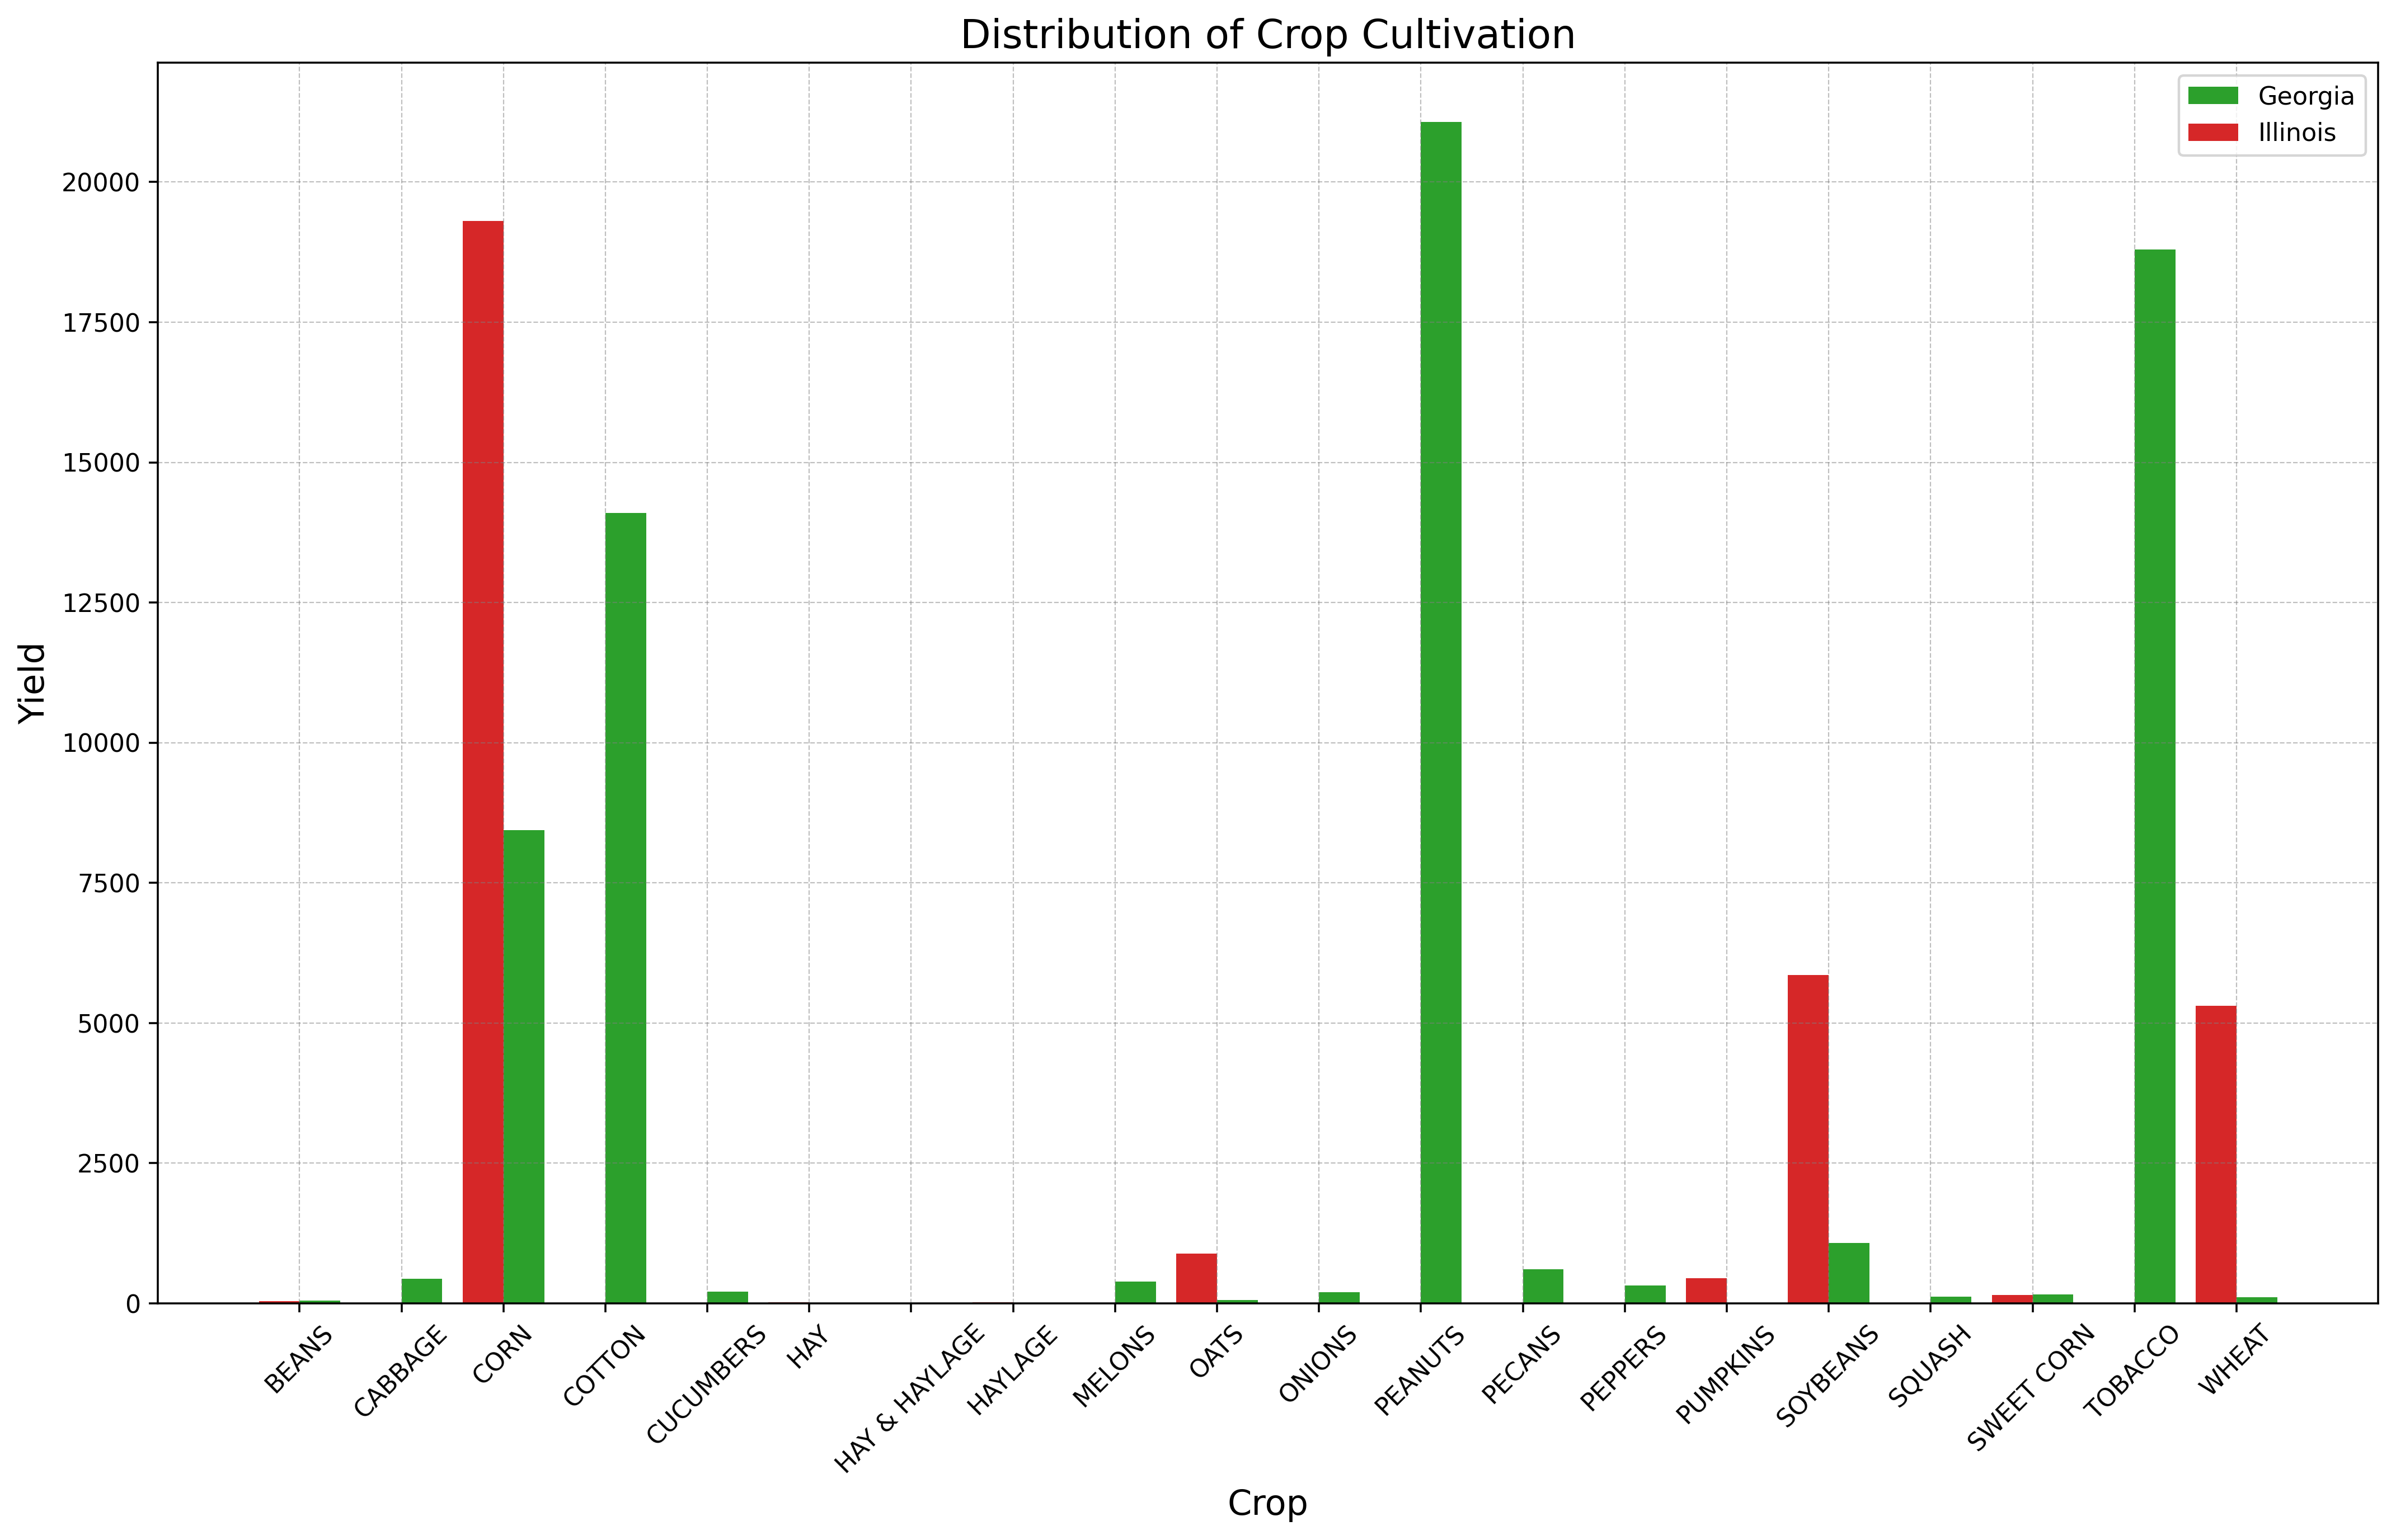

In [15]:
plt.figure(figsize=(16, 9), dpi=320)

x_axis = np.arange(len(df_yield_georgia)) 

plt.bar(x_axis + 0.2, df_yield_georgia['VALUE'], width=0.4, color='C2', label='Georgia')
plt.bar(x_axis - 0.2, df_yield_illinois['VALUE'], width=0.4, color='C3', label='Illinois')

plt.xticks(x_axis, df_yield_georgia['COMMODITY_DESC'], rotation=45)
plt.ylabel('Yield', fontsize=14)
plt.xlabel('Crop', fontsize=14)
plt.legend()
plt.title('Distribution of Crop Cultivation', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.savefig('../graphics/Distribution of Crop Cultivation.png')
plt.show()

## Crop yield

Finding the sum of the entire harvest for 2023.

In [16]:
df_year_crops = df_2023[(df_2023['STATISTICCAT_DESC'] == 'YIELD')&(df_2023['STATE_NAME'] == 'US TOTAL')]
df_year_crops = df_year_crops.groupby(['COMMODITY_DESC'], as_index = False)['VALUE'].sum() 
df_year_crops = df_year_crops.sort_values('VALUE', ascending = False)

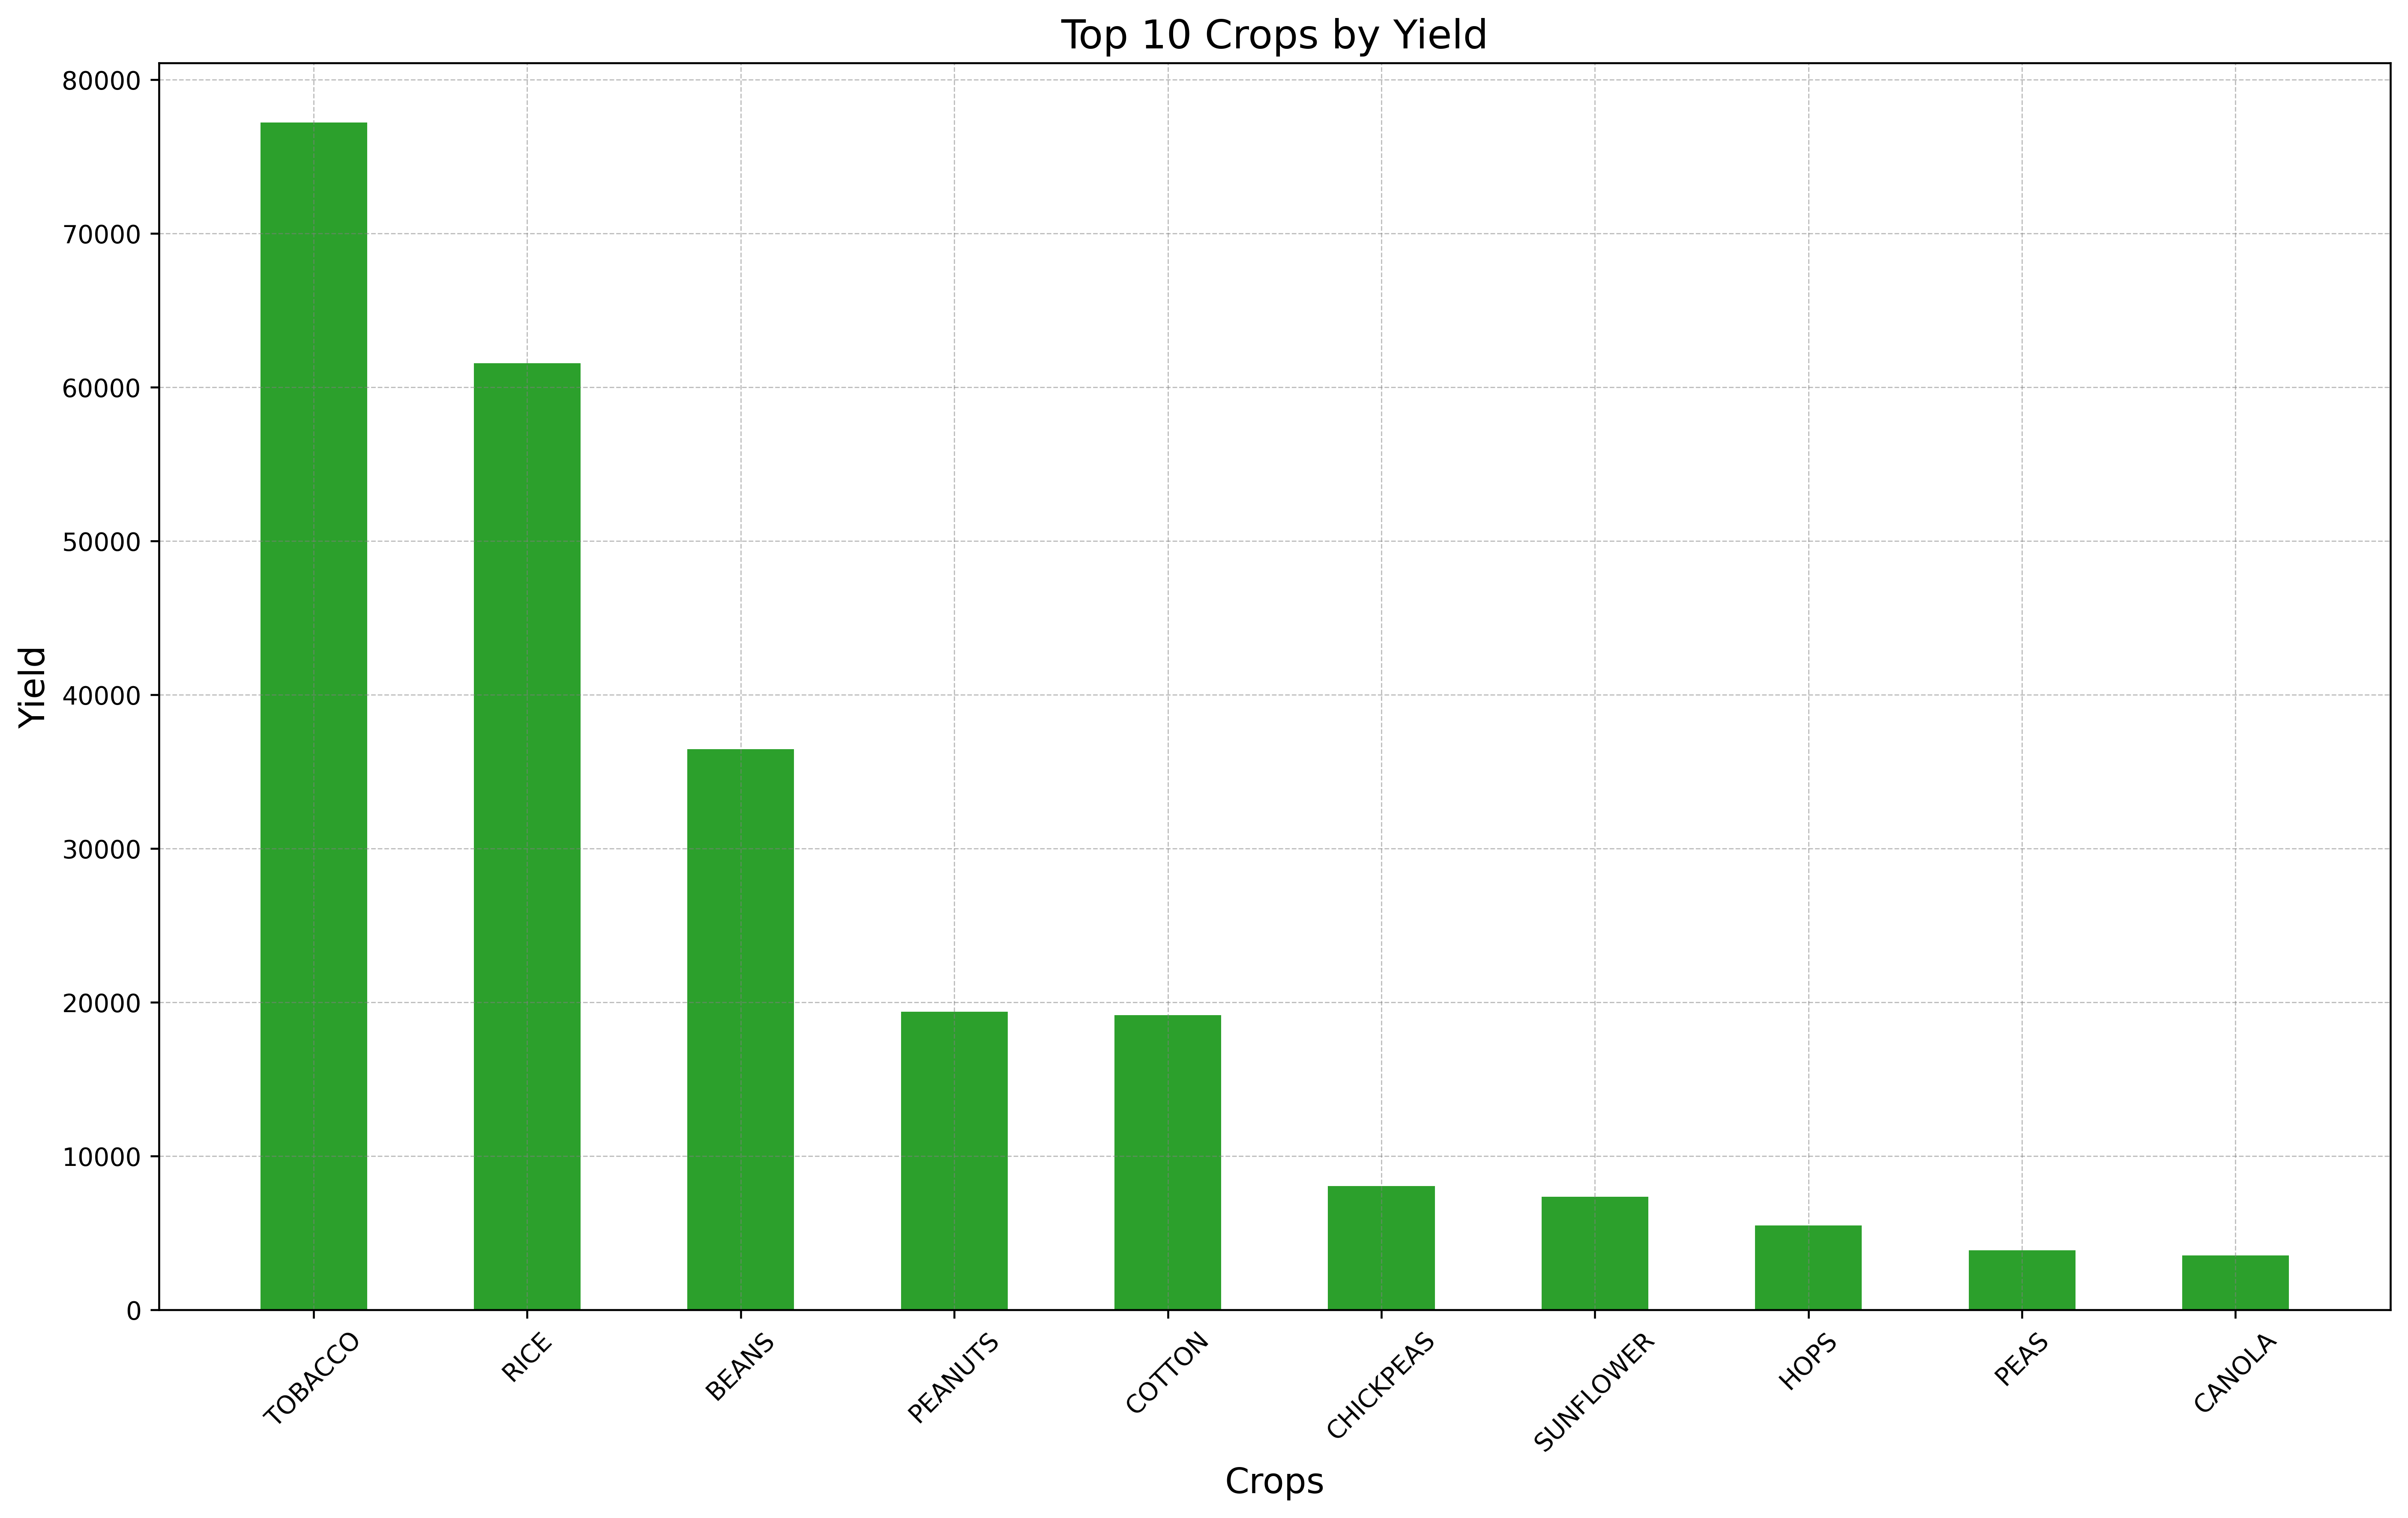

In [17]:
plt.figure(figsize=(16, 9), dpi=420)
plt.bar(df_year_crops['COMMODITY_DESC'][:10], df_year_crops['VALUE'][:10], color='C2',  width=0.5)

plt.xticks(rotation=45)
plt.ylabel('Yield', fontsize=14)
plt.xlabel('Crops', fontsize=14)
plt.title('Top 10 Crops by Yield', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.savefig('../graphics/Top 10 Crops by Yield.png')
plt.show()

## Comparison of data for different years

Selecting data for two different years for the region and summarize.

In [18]:
df_yield_georgia_corn = df[(df['STATISTICCAT_DESC'] == 'YIELD')&(df['STATE_NAME'] == 'US TOTAL')&(df['COMMODITY_DESC'] == 'CORN')]
df_yield_georgia_corn = df_yield_georgia_corn.groupby(['YEAR'], as_index = False)['VALUE'].sum()

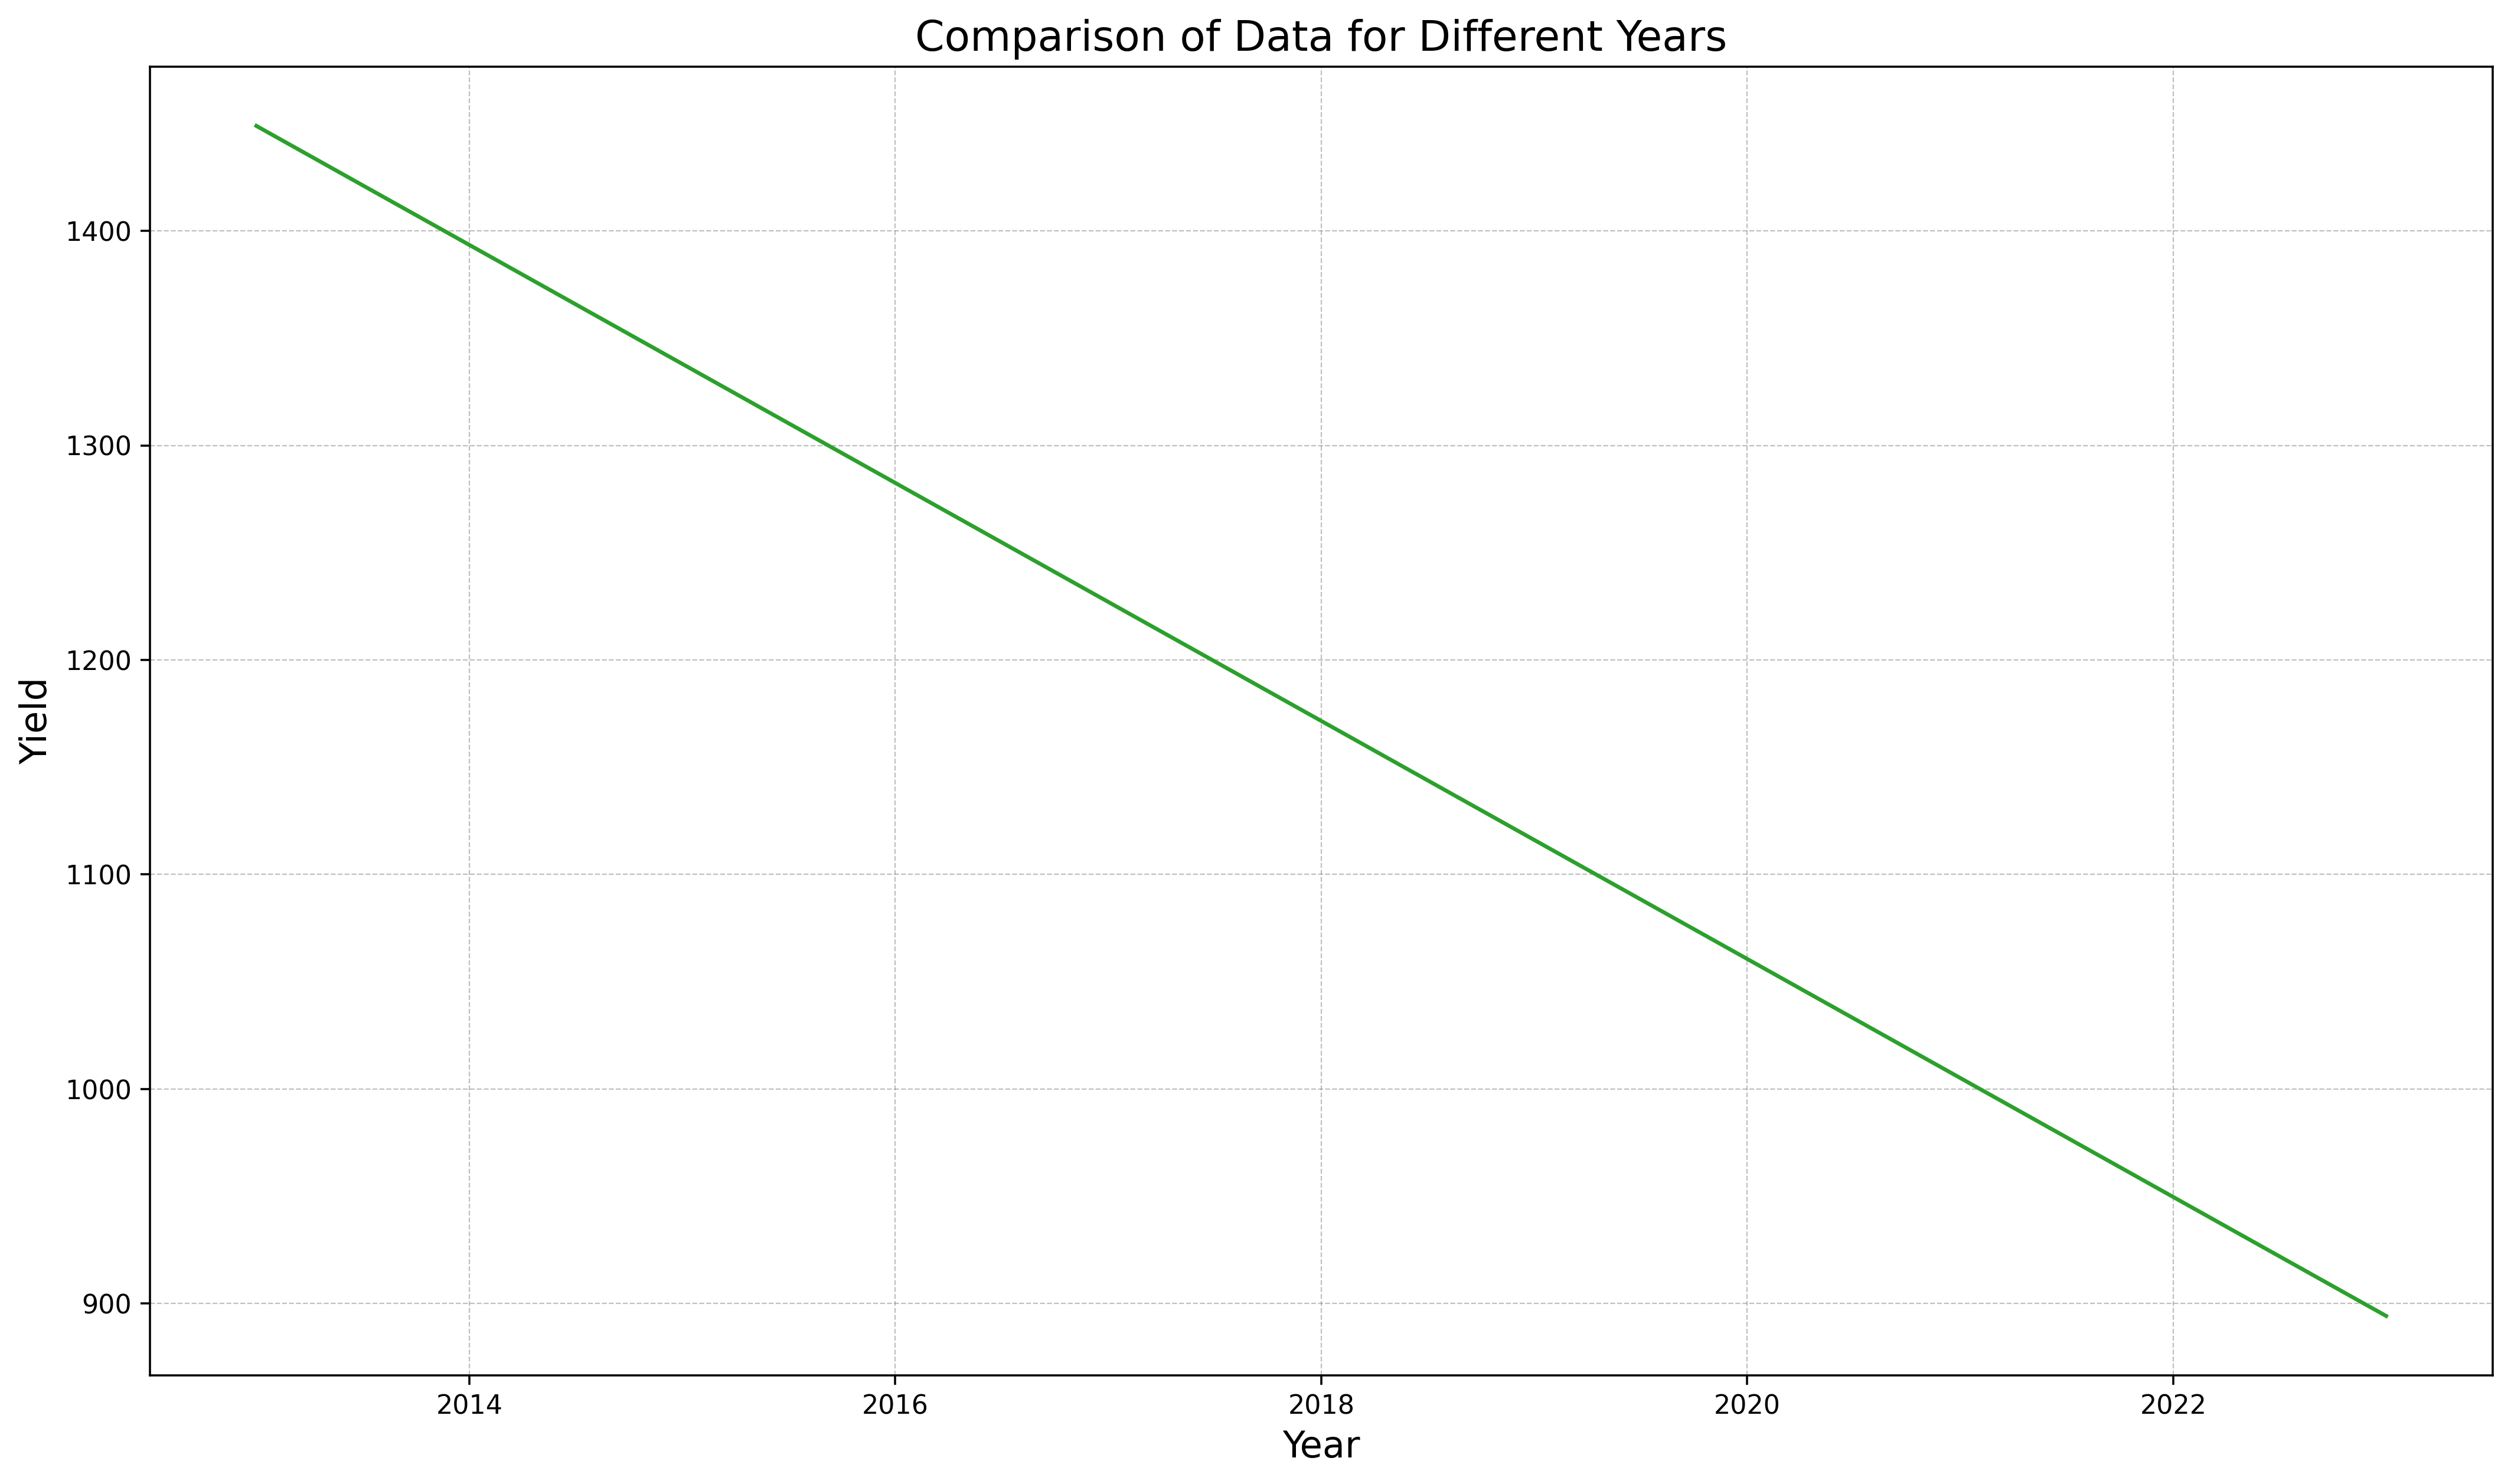

In [19]:
plt.figure(figsize=(16, 9), dpi=320)

plt.plot(df_yield_georgia_corn['YEAR'], df_yield_georgia_corn['VALUE'], color='C2')
plt.ylabel('Yield', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Comparison of Data for Different Years', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.savefig('../graphics/Comparison of data for different years.png')
plt.show()

## Finding week points

We can find weak points in the production method finding the total yield for all practices.

In [20]:
df_yield_prodn = df_yield[df_yield['PRODN_PRACTICE_DESC']!='ALL PRODUCTION PRACTICES'].groupby(['PRODN_PRACTICE_DESC'], as_index = False)['VALUE'].sum()
df_yield_prodn = df_yield_prodn.sort_values('VALUE', ascending = False)

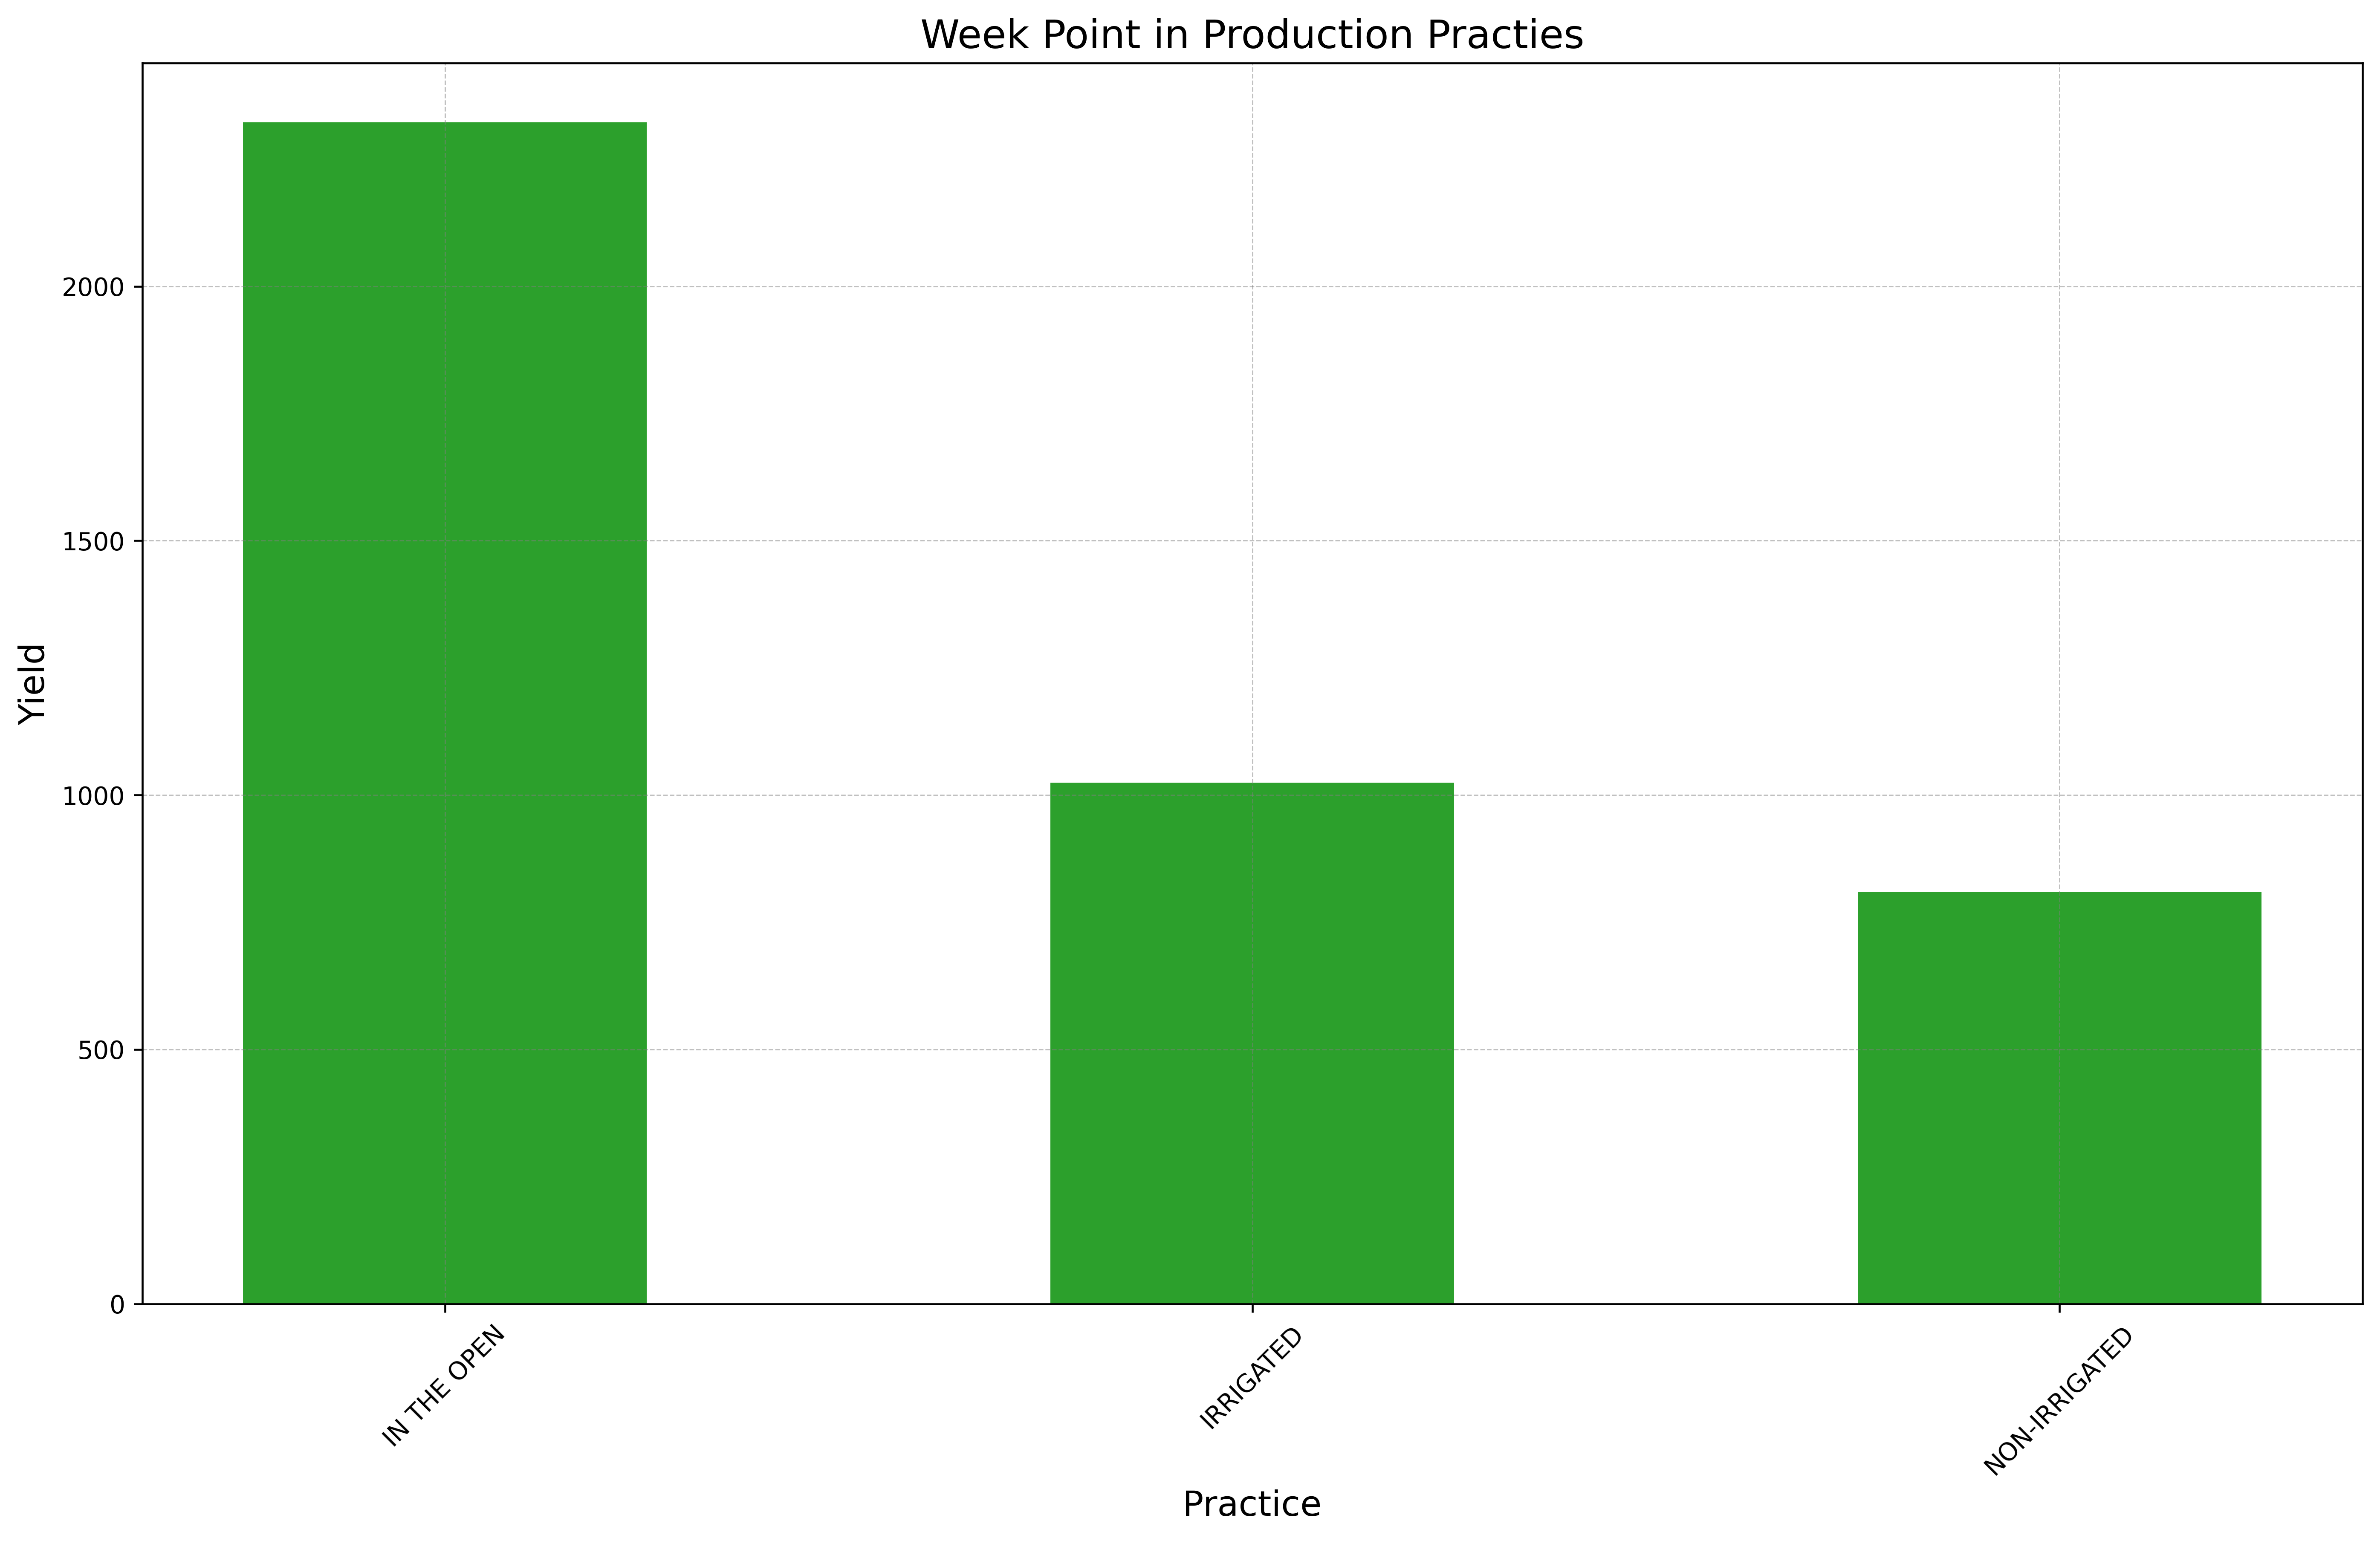

In [21]:
plt.figure(figsize=(16, 9), dpi=420)
plt.bar(df_yield_prodn['PRODN_PRACTICE_DESC'], df_yield_prodn['VALUE'], color='C2',  width=0.5)

plt.xticks(rotation=45)
plt.ylabel('Yield', fontsize=14)
plt.xlabel('Practice', fontsize=14)
plt.title('Week Point in Production Practies', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.savefig('../graphics/Week Point in Production Practies.png')
plt.show()